# **WORD2VEC & PMI**

Summary:


1.   Import *narco_schedule*
2.   Import Word2Vec and Train Models
3.   Relevant Terms
4.   Relevance along Temporal Dimension
5.   Correlation among Terms




---

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import sys
sys.path.append('/content/drive/My Drive/Università/inforet_prj/')

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()
import pandas as pd
import pickle
import string
import seaborn as sns; sns.set()
from scipy.stats import norm
from matplotlib import pyplot
import matplotlib.pyplot as plt
import math
from nltk import ngrams
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

## **1. Import narco_schedule**

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/narco_schedule.pkl", "rb") as f:
  narco_schedule = pickle.load(f)

In [ ]:
narco_schedule = narco_schedule.loc[(narco_schedule.schedule == "narco_1") | (narco_schedule.schedule == "narco_2")  ] 

## **2. Import Word2Vec and Train Models**

In [ ]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

In [ ]:
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz'
word_vectors = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

In [ ]:
narcos = ['narco_1', 'narco_2']

In [ ]:
n = 5
sequences = {}
for nar in narcos:
    for sched, x in tqdm(zip(narco_schedule.schedule, narco_schedule.lemmatized), total=narco_schedule.shape[0]):
        penta_gram = ngrams(x.split(), n)

        sequences[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

In [ ]:
import itertools
dict(itertools.islice(sequences.items(), 1))

---

In [ ]:
models = {}
for sched, sequence in sequences.items():
    models[sched] = Word2Vec(sequences[sched], min_count=10)

In [ ]:
import itertools
dict(itertools.islice(models.items(), 2))

---

In [ ]:
#with open("/content/drive/MyDrive/Università/inforet_prj/models.pkl", "wb") as f:
#    pickle.dump(models, f)

---

## **3. Relevant Terms**

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/models.pkl", "rb") as f:
  models = pickle.load(f)

---

### *3.1 Cosine similarity own narcotics*

In [ ]:
schedule_1 = ["cannabis",  "marijuana",  "lsd", "heroin", "ecstasy", "peyote", "mescaline", "mda" , 'methaqualone', "mdma", 'methaqualone' ]
schedule_2 = ["cocaine", "methamphetamine", "dilaudid", "meperidine", "demerol",  "dexedrine", "fentanyl", "ritalin", "methadone", "amphetamine", "phencyclidine", "pseudoephedrine", "ephedrine", "opium", "dilaudid", "preludin", "hydromorphone", 'oxycodone'] 

In [ ]:
schedules = schedule_1 + schedule_2

In [ ]:
for sched, model in models.items():
    print(sched)

In [ ]:
for sched, model in models.items():
    if sched == 'narco_1':
        for y in schedule_1:
            if y in model.wv.vocab:
                print(sched, y, [(x[0], round(x[1], 2)) for x in model.wv.most_similar(positive=y)][:5])
    elif sched == 'narco_2':
        for y in schedule_2:
            if y in model.wv.vocab:
                print(sched, y, [(x[0], round(x[1], 2)) for x in model.wv.most_similar(positive=y)][:5])

narco_1 cannabis [('marijuana', 0.57), ('heroin', 0.56), ('sativa', 0.56), ('substance', 0.54), ('manufacture', 0.53)]
narco_1 marijuana [('cannabis', 0.57), ('pot', 0.54), ('reefer', 0.53), ('underage', 0.53), ('liquor', 0.5)]
narco_1 lsd [('gram', 0.63), ('tablet', 0.62), ('diacetyl', 0.62), ('barbituric', 0.61), ('homogeneous', 0.61)]
narco_1 heroin [('narcotic', 0.75), ('drug', 0.63), ('cannabis', 0.56), ('tinfoil', 0.55), ('capsule', 0.53)]
narco_1 ecstasy [('pill', 0.66), ('pentazocine', 0.59), ('cellophane', 0.59), ('sandwich', 0.57), ('dagger', 0.56)]
narco_1 peyote [('administering', 0.71), ('antidepressant', 0.7), ('topical', 0.7), ('riminal', 0.66), ('adrenalin', 0.64)]
narco_1 mescaline [('morphine', 0.69), ('ingestion', 0.67), ('bile', 0.67), ('sedative', 0.64), ('milligram', 0.64)]
narco_1 mda [('placemat', 0.76), ('recodifie', 0.72), ('vile', 0.72), ('consignment', 0.72), ('sifter', 0.71)]
narco_1 methaqualone [('mda', 0.63), ('homogeneous', 0.59), ('vile', 0.59), ('plac

In [ ]:
def most_similar_list_value(model_, word, n):
    lista = []
    for sched, model in model_.items():
        if word in model.wv.vocab:
            for x in model.wv.most_similar(positive=word)[:n]:
                lista.append([x[0],round(x[1], 2)])
    return lista

In [ ]:
narco_1_cannabis = most_similar_list_value(models, 'cannabis', 10)
narco_1_marijuana = most_similar_list_value(models, 'marijuana', 10)
narco_1_lsd = most_similar_list_value(models, 'lsd', 10)
narco_1_heroin = most_similar_list_value(models, 'heroin', 10)
narco_1_mdma = most_similar_list_value(models, 'mdma', 10)

terms_narco_1 = pd.concat([pd.DataFrame(narco_1_cannabis, columns=['cannabis', 'value']), 
                           pd.DataFrame(narco_1_marijuana, columns=['marijuana', 'value']), 
                           pd.DataFrame(narco_1_lsd, columns=['lsd', 'value']), 
                           pd.DataFrame(narco_1_heroin, columns=['heroin', 'value']), 
                           pd.DataFrame(narco_1_mdma, columns=['mdma', 'value'])],                                              
                           axis=1)
terms_narco_1

,cannabis,value,marijuana,value,lsd,value,heroin,value,mdma,value
0,marijuana,0.57,cannabis,0.57,gram,0.63,narcotic,0.75,tablet,0.60
1,heroin,0.56,pot,0.54,tablet,0.62,drug,0.63,homogeneous,0.58
2,sativa,0.56,reefer,0.53,diacetyl,0.62,cannabis,0.56,lsd,0.55
3,substance,0.54,underage,0.53,barbituric,0.61,tinfoil,0.55,placemat,0.55
4,manufacture,0.53,liquor,0.50,homogeneous,0.61,capsule,0.53,resin,0.54
5,contraband,0.53,telegram,0.49,mda,0.61,dope,0.53,randomly,0.53
6,gram,0.53,junk,0.49,controlled,0.59,gram,0.52,crumble,0.52
7,plant,0.50,whiskey,0.49,powdered,0.59,pill,0.50,grain,0.51
8,drug,0.49,dope,0.48,derivative,0.57,powder,0.49,crushed,0.51
9,methaqualone,0.46,cider,0.48,indole,0.57,tablet,0.48,medicinal,0.51


In [ ]:
narco_2_cocaine = most_similar_list_value(models, 'cocaine', 10)
narco_2_methamphetamine = most_similar_list_value(models, 'methamphetamine', 10)
narco_2_amphetamine = most_similar_list_value(models, 'amphetamine', 10)
narco_2_pseudoephedrine = most_similar_list_value(models, 'pseudoephedrine', 10)
narco_2_phencyclidine = most_similar_list_value(models, 'phencyclidine', 10)

terms_narco_2 = pd.concat([pd.DataFrame(narco_2_cocaine, columns=['cocaine', 'value']), 
                           pd.DataFrame(narco_2_methamphetamine, columns=['methamphetamine', 'value']),
                           pd.DataFrame(narco_2_amphetamine, columns=['amphetamine', 'value']),
                           pd.DataFrame(narco_2_pseudoephedrine, columns=['pseudoephedrine', 'value']), 
                           pd.DataFrame(narco_2_phencyclidine, columns=['phencyclidine', 'value'])],
                          axis=1)
terms_narco_2

,cocaine,value,methamphetamine,value,amphetamine,value,pseudoephedrine,value,phencyclidine,value
0,drug,0.72,pseudoephedrine,0.70,pill,0.70,ephedrine,0.73,mixture,0.69
1,narcotic,0.69,phencyclidine,0.56,caffeine,0.70,methamphetamine,0.70,salt,0.68
2,amphetamine,0.55,manufacture,0.56,tablet,0.69,capsule,0.68,hydrochloric,0.67
3,powder,0.55,ephedrine,0.52,phencyclidine,0.65,tablet,0.66,acid,0.66
4,gram,0.54,manufacturing,0.52,capsule,0.65,pill,0.64,hydrochloride,0.66
5,sixteenth,0.54,mixture,0.51,barbiturate,0.64,filter,0.63,amphetamine,0.65
6,kilogram,0.52,cocaine,0.51,milligram,0.64,milligram,0.63,isomer,0.64
7,coke,0.51,simulation,0.50,hydrochloride,0.64,mixture,0.62,caffeine,0.64
8,methamphetamine,0.51,pill,0.49,morphine,0.63,salt,0.62,barbituric,0.64
9,substance,0.50,ingredient,0.49,grain,0.61,precursor,0.61,opium,0.63


---

### *3.2 Cosine similarity with list of shared terms*

List of shared terms = 'drug', 'narcotic', 'substance', 'crime', 'addiction'

In [ ]:
def most_similar_list_schedule_shared(model_, narcos, word, n):
    lista = []
    for sched, model in model_.items():
        if sched == narcos:
            for x in model.wv.most_similar(positive=word)[:n]:
                lista.append(x[0])
    return lista

In [ ]:
lista_drug_1 = most_similar_list_schedule_shared(models, 'narco_1', 'drug', 10)
lista_narcotic_1 = most_similar_list_schedule_shared(models, 'narco_1', 'narcotic', 10)
lista_substance_1 = most_similar_list_schedule_shared(models, 'narco_1','substance', 10)
lista_crime_1 =  most_similar_list_schedule_shared(models, 'narco_1','crime', 10)
lista_addiction_1 =  most_similar_list_schedule_shared(models,'narco_1', 'addiction', 10)
lista_drug_2 = most_similar_list_schedule_shared(models,'narco_2', 'drug', 10)
lista_narcotic_2 = most_similar_list_schedule_shared(models,'narco_2','narcotic', 10)
lista_substance_2 = most_similar_list_schedule_shared(models,'narco_2', 'substance', 10)
lista_crime_2 =  most_similar_list_schedule_shared(models,'narco_2','crime', 10)
lista_addiction_2 =  most_similar_list_schedule_shared(models, 'narco_2','addiction', 10)

In [ ]:
similar_compare_drug = pd.concat([pd.DataFrame(lista_drug_1, columns=['drug_1']),  pd.DataFrame(lista_drug_2, columns=['drug_2'])], axis=1)
similar_compare_narcotic = pd.concat([pd.DataFrame(lista_narcotic_1, columns=['narcotic_1']),  pd.DataFrame(lista_narcotic_2, columns=['narcotic_2'])], axis=1)
similar_compare_substance = pd.concat([pd.DataFrame(lista_substance_1, columns=['substance_1']),  pd.DataFrame(lista_substance_2, columns=['substance_2'])], axis=1)
similar_compare_crime = pd.concat([pd.DataFrame(lista_crime_1, columns=['crime_1']),  pd.DataFrame(lista_crime_2, columns=['crime_2'])], axis=1)
similar_compare_addiction = pd.concat([pd.DataFrame(lista_addiction_1, columns=['addiction_1']),  pd.DataFrame(lista_addiction_2, columns=['addiction_2'])], axis=1)

In [ ]:
df_common_terms = pd.concat([similar_compare_drug, similar_compare_narcotic, similar_compare_substance, similar_compare_addiction ], axis=1)
df_common_terms

,drug_1,drug_2,narcotic_1,narcotic_2,substance_1,substance_2,addiction_1,addiction_2
0,heroin,narcotic,heroin,drug,tablet,phencyclidine,addict,drunkenness
1,narcotic,cocaine,drug,cocaine,cannabis,gram,dependency,addict
2,dope,buying,buyer,contraband,lsd,cocaine,habit,craving
3,junk,amphetamine,dope,substance,gram,narcotic,usage,usage
4,cannabis,occasional,contraband,occasional,manufacturing,profiteer,user,abuser
5,profiteer,consummate,illicit,amphetamine,barbituric,amphetamine,pusher,alcoholism
6,shoplift,ongoing,cannabis,middleman,pill,purveyor,abuser,relapse
7,marijuana,dope,consummate,paraphernalia,pentazocine,drug,overdose,abstain
8,abuser,profit,junk,methamphetamine,chemical,powder,withdrawal,overdose
9,codeine,substance,pusher,ongoing,capsule,isomer,alcoholism,dependence


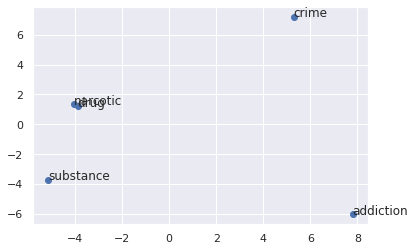

In [ ]:
for sched, model in models.items():    
    X = model.wv[shared_terms]
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(shared_terms):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

---

Here we investigate the difference of top similar terms between models trained differently.



In [ ]:
# Word2Vec trained on Google News data.
word_vectors.most_similar('drug')

[('drugs', 0.8491184711456299),
 ('Drug', 0.7462924122810364),
 ('narcotics', 0.6429657936096191),
 ('cocaine', 0.6090095043182373),
 ('heroin', 0.6076127886772156),
 ('narcotic', 0.6070550680160522),
 ('prescription_drugs', 0.5968070030212402),
 ('illicit_drugs', 0.5944103598594666),
 ('prescription_drug', 0.5941191911697388),
 ('painkiller_Oxycodone', 0.5939620137214661)]

In [ ]:
# Word2Vec trained on both Schedule I and Schedule II Illinois Bulk Data.
for sched, model in models.items():
        print(model.wv.most_similar(positive='drug')[0:10])

[('heroin', 0.6244809031486511), ('narcotic', 0.6018561720848083), ('dope', 0.5852581262588501), ('cannabis', 0.5314615368843079), ('junk', 0.5080208778381348), ('stash', 0.4647700786590576), ('transportation', 0.4563524127006531), ('marijuana', 0.4519568085670471), ('abuser', 0.44541895389556885), ('shoplift', 0.44376879930496216)]
[('narcotic', 0.805453896522522), ('cocaine', 0.7334312200546265), ('dope', 0.48488348722457886), ('amphetamine', 0.4803611636161804), ('profit', 0.47907787561416626), ('occasional', 0.4749113917350769), ('buying', 0.4705352187156677), ('consummate', 0.4631741940975189), ('methamphetamine', 0.45951715111732483), ('substance', 0.45590248703956604)]


---

## **4. Relevance along Temporal Dimension**

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/narco_time.pkl", "rb") as f:
  narco_time = pickle.load(f)

In [ ]:
years = ['50s', '60s', '70s', '80s', '90s', '00s']

In [ ]:
n = 5
sequences_time = {}
for year in years:
    for year, x in tqdm(zip(narco_time.year, narco_time.lemmatized), total=narco_time.shape[0]):
        penta_gram = ngrams(x.split(), n)

        sequences_time[year] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

In [ ]:
models_time = {}
for year, sequence in sequences_time.items():
    models_time[year] = Word2Vec(sequences_time[year], min_count=10)

In [ ]:
#with open("/content/drive/MyDrive/Università/inforet_prj/models_time.pkl", "wb") as f:
#    pickle.dump(models_time, f)

---

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_time.pkl", "rb") as f:
    models_time = pickle.load(f)

In [ ]:
def most_similar_list_time(st_time(model_, time, word, n):
    for year, model in model_.items():
        if year == time:
            for x in model.wv.most_similar(positive=word)[:n]:
                print(year, x[0], x[1])

In [ ]:
most_similar_list_time(models_time, '00s','drug', 2)

00s narcotic 0.7557021379470825
00s cannabis 0.6491005420684814


---

### *4.1 Similarity betweeen words along temporal dimesion*

In [ ]:
def similarity_2_words_time(model_, word1, word2):
    print('(' , word1 , '-' , word2, ')')
    for year, model in model_.items():
        try:
            print(year, round(model.wv.similarity( word1, word2 ), 3) )
        except:
            print(year, 'No data to display')

In [ ]:
similarity_2_words_time(list_models_time_schedule_1, 'drug', 'cannabis')

( drug - cannabis )
50s 0.991
60s 0.623
70s 0.352
80s 0.292
90s 0.396
00s 0.534


---

## **5. Correlation among Terms**

In [2]:
narco_1_pmi = pd.read_csv("/content/drive/MyDrive/Università/inforet_prj/narco_1_pmi_nlp.csv", sep="|" , names = ['sent_clean'], header=None)

In [3]:
narco_1_pmi = narco_1_pmi.loc[(narco_1_pmi.sent_clean == '')|(~pd.isna(narco_1_pmi.sent_clean))]

In [18]:
narco_2_pmi = pd.read_csv("/content/drive/MyDrive/Università/inforet_prj/narco_2_pmi_nlp.csv", sep="|" , names = ['sent_clean'], header=None)

In [19]:
narco_2_pmi = narco_2_pmi.loc[(narco_2_pmi.sent_clean == '')|(~pd.isna(narco_2_pmi.sent_clean))]

In [2]:
narco_pmi = pd.read_csv("/content/drive/MyDrive/Università/inforet_prj/narco_pmi_nlp.csv", sep="|" , names = ['sent_clean'], header=None)

In [3]:
narco_pmi = narco_pmi.loc[(narco_pmi.sent_clean == '')|(~pd.isna(narco_pmi.sent_clean))]

### *5.1 Single Terms co-occurrence Matrix*

In [4]:
def get_co_pmi_value(word1, word2, matrix):
    return matrix.loc[matrix.index == word1, [word2]]

In [5]:
def pmi(df, positive=True):
    col_totals = df.sum(axis=0)
    total = col_totals.sum()
    row_totals = df.sum(axis=1)
    expected = np.outer(row_totals, col_totals) / total
    df_pmi = df / expected
    with np.errstate(divide='ignore'):
        df_pmi = np.log(df_pmi)
    df_pmi[np.isinf(df_pmi)] = 0.0 
    if positive:
        df_pmi[df_pmi < 0] = 0.0
    return df_pmi

In [6]:
def max_cooccurrences(df_column):
    return df_column.idxmax() , df_column.max() 

#### *5.1.1 Co-occurrence schedule I*

In [13]:
vect_1_pmi = CountVectorizer(min_df=0.01)
X_1_pmi = vect_1_pmi.fit_transform(narco_1_pmi.sent_clean)

In [14]:
df_1_pmi = pd.DataFrame(X_1_pmi.todense(), columns=vect_1_pmi.vocabulary_)

In [15]:
df_1_pmi_asint = df_1_pmi.astype(int)
coocc_1_pmi = df_1_pmi_asint.T.dot(df_1_pmi_asint)

In [ ]:
coocc_1_pmi.values[[np.arange(coocc_1_pmi.shape[0])]*2] = 0

In [18]:
with open("/content/drive/MyDrive/Università/inforet_prj/coocc_1_pmi.pkl", "wb") as f:
    pickle.dump(coocc_1_pmi, f)

In [19]:
get_co_pmi_value('follow', 'order', coocc_1_pmi)

,order
follow,87


In [20]:
pmi_matrix_1_pmi = pmi(coocc_1_pmi, positive=True)
pmi_matrix_1_pmi

,appeal,order,petition,contend,convict,follow,jury,trial,unlawful,defendant,proceeding,sentence,probation,second,allege,charge,possession,receive,present,motion,arrest,suppress,evidence,cross,prosecution,witness,fail,testimony,apartment,find,argument,request,year,statute,time,conduct,drug,report,use,hearing,...,observe,act,control,doubt,rule,prove,term,determine,require,grant,warrant,concern,section,offense,record,sufficient,discretion,car,leave,note,case,involve,indicate,probable,murder,factor,vehicle,finding,conclude,apply,go,plaintiff,public,child,death,instruction,impose,narcotic,ground,respondent
appeal,0.000000,0.376650,0.000000,0.000000,0.000000,0.560284,0.000000,0.000000,0.000000,0.000000,0.092855,0.194741,0.000000,0.199399,0.000000,0.000000,0.374737,0.000000,0.772757,0.032648,0.095031,0.000000,0.000000,0.031193,0.816111,0.519960,0.440549,0.279566,0.000000,0.000000,1.335461,0.000000,0.148941,1.057634,0.000000,0.000000,0.093097,0.000000,0.530062,0.387627,...,0.651848,0.000000,0.000000,0.0,0.000000,0.000000,0.336347,0.293662,0.000000,0.000000,0.672099,0.000000,0.000000,0.000000,0.000000,0.083397,0.116360,0.000000,0.738190,0.000000,0.000000,0.101179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.255442,0.000000,0.245017,0.000000,0.000000,0.951700,0.403505,0.0,0.000000,0.000000
order,0.376650,0.000000,0.000000,0.172515,0.510458,0.663476,0.066491,0.000000,0.000000,0.156379,0.918641,0.352611,0.000000,0.000000,0.000000,0.000000,0.000000,0.467932,0.280061,0.252967,0.059591,0.000000,0.000000,0.329378,1.337768,0.000000,0.302292,0.641863,1.281733,0.000000,0.000000,0.204251,0.506082,0.684117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.712980,0.000000,0.000000,0.0,0.555809,0.000000,0.487335,0.000000,0.000000,0.522543,0.690928,0.000000,0.000000,0.000000,0.058622,0.213332,0.535117,0.000000,0.842340,0.193752,0.000000,0.000000,0.058733,0.000000,1.304261,0.000000,0.000000,0.060870,0.000000,0.000000,0.056077,0.000000,0.000000,0.000000,0.214107,0.066622,0.615118,0.0,0.000000,0.000000
petition,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.538659,0.000000,0.000000,0.000000,0.153483,0.000000,0.000000,0.000000,0.000509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060385,0.000000,0.000000,0.000000,0.011276,0.520072,0.000000,0.000000,0.141014,...,0.216507,0.000000,0.000000,0.0,0.085527,0.000000,0.000000,0.331148,0.000000,0.000000,0.000000,0.163588,0.000000,0.000000,0.000000,0.000000,0.000000,1.230800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.540464,0.620906,0.000000,0.368011,0.225471,0.876827,0.152065,0.186919,0.000000,0.000000,0.000000,0.509347,0.000000,0.0,0.259091,0.000000
contend,0.000000,0.172515,0.000000,0.000000,0.075682,0.000000,0.000000,0.000000,0.792704,0.000000,0.000000,0.000000,0.000000,0.883616,0.000000,0.000000,0.000000,0.000000,0.000000,0.103631,0.000000,0.000000,0.000000,0.000000,0.657773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.871363,...,0.000000,0.000000,2.299039,0.0,0.000000,0.561325,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.293178,0.589427,1.027532,0.000000,0.882105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.594461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.518791,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
convict,0.000000,0.510458,0.000000,0.075682,0.000000,0.000000,0.000000,0.000000,0.000000,0.250602,0.437499,0.000000,0.209572,0.000000,0.000000,0.201078,0.301628,0.247661,0.000000,0.185921,0.000000,0.000000,0.000000,0.178478,0.000000,0.065754,0.244708,0.024920,0.164464,0.237177,0.000000,0.151870,0.000000,0.109683,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.114055,0.236348,0.000000,0.0,0.244566,0.000000,0.091351,0.634255,0.000000,0.422610,0.514605,0.000000,0.067555,0.414807,0.417537,0.0

In [21]:
with open("/content/drive/MyDrive/Università/inforet_prj/pmi_matrix_1_pmi.pkl", "wb") as f:
    pickle.dump(pmi_matrix_1_pmi, f)

In [22]:
get_co_pmi_value('follow', 'order', pmi_matrix_1_pmi)

,order
follow,0.663476


#### *5.1.2 Co-occurrence Schedule II*

In [20]:
vect_2_pmi = CountVectorizer(min_df=0.01)
X_2_pmi = vect_2_pmi.fit_transform(narco_2_pmi.sent_clean)

In [21]:
df_2_pmi = pd.DataFrame(X_2_pmi.todense(), columns=vect_2_pmi.vocabulary_)

In [22]:
df_2_pmi_asint = df_2_pmi.astype(int)
coocc_2_pmi = df_2_pmi_asint.T.dot(df_2_pmi_asint)

In [ ]:
coocc_2_pmi.values[[np.arange(coocc_2_pmi.shape[0])]*2] = 0

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/coocc_2_pmi.pkl", "wb") as f:
    pickle.dump(coocc_2_pmi, f)

In [26]:
get_co_pmi_value('follow', 'order', coocc_2_pmi)

,order
follow,43


In [25]:
pmi_matrix_2_pmi = pmi(coocc_2_pmi, positive=True)
pmi_matrix_2_pmi

,murder,criminal,jury,convict,determine,factor,sufficient,death,trial,sentence,defendant,term,year,review,appeal,argue,err,admit,evidence,find,apartment,allow,testimony,concern,order,examination,sentencing,defense,witness,testify,argument,question,impose,affirm,conviction,arrest,day,law,officer,report,...,motion,request,doubt,involve,receive,record,section,statute,set,prior,home,petition,attorney,finding,information,test,warrant,control,base,include,party,intent,charge,possession,reverse,bag,new,show,appellate,drive,case,claim,judgment,suppress,gun,occur,prosecutor,vehicle,respondent,plaintiff
murder,0.000000,0.000000,0.000000,0.741427,0.000000,0.000000,0.199466,0.655286,0.000000,0.047597,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.668337,0.000000,0.000000,0.000000,0.050044,0.000000,0.000000,1.878295,0.000000,0.000000,0.00000,0.000000,0.000000,0.159199,0.539318,0.000000,0.234260,0.000000,0.172977,0.000000,...,0.000000,1.096135,0.454229,0.189573,1.106371,1.042295,0.131159,0.000000,0.000000,0.000000,0.000000,0.363444,0.000000,0.551449,0.210050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.725282,0.000000,0.023974,0.000000,0.000000,0.000000,0.211781,0.000000,0.000000,0.000000,0.000000,0.704805,0.019647,0.00000,0.000000,0.000000,0.000000,0.000000,0.397924
criminal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.431640,0.000000,0.000000,0.000000,0.000000,0.173207,0.000000,0.000000,0.000000,0.000000,0.495193,0.000000,0.0,0.559827,0.161323,0.164993,0.000000,0.000000,0.410228,1.066773,0.608920,0.318768,0.412205,0.000000,0.00000,0.000000,1.626270,0.000000,0.111276,0.929298,0.000000,0.000000,0.000000,0.000000,...,0.334527,0.000000,0.886180,0.000000,0.000000,0.000000,0.000000,0.681782,0.000000,0.000000,0.110672,0.575367,0.000000,0.000000,0.000000,0.000000,0.001149,0.129076,0.000000,0.824039,0.000000,0.000000,0.000000,0.360907,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.141503,0.000000,0.298032,0.00000,0.748824,0.248683,0.000000,0.000000,0.000000
jury,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.167471,0.379681,0.687287,0.507357,0.000000,1.258115,0.000000,0.207043,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.775413,0.000000,0.000000,0.149718,0.000000,0.666231,0.00000,0.000000,0.000000,0.540570,0.277553,0.000000,0.119316,0.123799,0.000000,0.000000,...,0.188471,1.061348,0.000000,0.024254,0.000000,0.165944,0.057777,0.373611,0.000000,0.307311,0.319277,0.334547,0.000000,0.000000,0.250583,0.066454,0.000000,0.067742,0.000000,0.381608,0.053333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003080,0.000000,0.00000,0.000000,0.000000,0.314174,0.000000,0.000000
convict,0.741427,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066201,0.437964,0.000000,0.000000,0.000000,0.183411,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.56147,0.000000,0.000000,0.213353,0.065849,0.000000,0.000000,0.000000,0.422677,0.000000,...,0.000000,0.260766,0.000000,0.000000,0.000000,0.000000,0.000000,0.255367,0.086368,0.000000,0.000000,0.000000,0.317822,0.000000,0.000000,0.000000,0.205773,0.000000,1.222436,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.107435,0.477407,0.000000,0.118455,0.108206,0.812304,0.000000,0.161787,0.000000,0.00000,0.487878,0.000000,0.000000,0.293071,0.000000
determine,0.000000,0.000000,0.000000,0.000000,0.000000,0.075824,0.000000,0.000000,0.000000,0.839890,2.554398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.025117,0.636922,0.000000,0.000000,0.000000,0.000000,0.610794,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.029408,0.000000,0.000000,2.288634,0.196495,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.383212,0.044264

In [28]:
with open("/content/drive/MyDrive/Università/inforet_prj/pmi_matrix_2_pmi.pkl", "wb") as f:
    pickle.dump(pmi_matrix_2_pmi, f)

In [27]:
get_co_pmi_value('follow', 'order', pmi_matrix_2_pmi)

,order
follow,0.002148


----

#### *5.2.1 Bi-grams co-occurrences Schedule I*

In [4]:
vect_bigr_1_pmi = CountVectorizer(min_df=0.001, ngram_range=(2,2))
X_bigr_1_pmi = vect_bigr_1_pmi.fit_transform(narco_1_pmi.sent_clean)

In [5]:
X_bigr_1_pmi

<180692x413 sparse matrix of type '<class 'numpy.int64'>'
	with 152381 stored elements in Compressed Sparse Row format>

In [6]:
df_1_pmi_bigr = pd.DataFrame(X_bigr_1_pmi.todense(), columns=vect_bigr_1_pmi.vocabulary_)

In [7]:
df_1_pmi_bigr_asint = df_1_pmi_bigr.astype(int)
coocc_bigr_1_pmi = df_1_pmi_bigr_asint.T.dot(df_1_pmi_bigr_asint)

In [ ]:
coocc_bigr_1_pmi.values[[np.arange(coocc_bigr_1_pmi.shape[0])]*2] = 0

In [16]:
with open("/content/drive/MyDrive/Università/inforet_prj/coocc_bigr_1_pmi.pkl", "wb") as f:
    pickle.dump(coocc_bigr_1_pmi, f)

In [14]:
pmi_1_pmi_bigr_matrix = pmi(coocc_bigr_1_pmi, positive=True)
pmi_1_pmi_bigr_matrix

,appeal order,jury trial,intent deliver,represent defendant,sentence defendant,defendant probation,defendant charge,charge unlawful,unlawful possession,ineffective assistance,present defendant,defendant motion,motion quash,quash arrest,arrest suppress,suppress evidence,cross examine,present evidence,defendant testimony,closing argument,notice appeal,defendant request,time defendant,defendant trial,defendant petition,hold defendant,time trial,argument defendant,defendant know,defendant claim,effective assistance,defendant attorney,year old,appeal defendant,fact defendant,defendant allege,trial err,find defendant,defendant fail,judgment affirm,...,testimony witness,burden proof,defendant state,year term,enter judgment,lesser include,include offense,involuntary manslaughter,guilty offense,defendant object,substance contain,mental state,grant defendant,year year,self defense,question defendant,direct examination,home invasion,pro se,plastic bag,summary judgment,public policy,contain heroin,bag contain,order grant,term sentence,parental right,defendant possession,knock door,living room,charge possession,year age,offer proof,evidence obtain,attorney fee,sentence term,sale narcotic,narcotic drug,possession narcotic,voluntary manslaughter
appeal order,0.000000,0.859882,0.463089,0.000000,0.000000,0.000000,0.033527,0.000000,0.000000,0.162082,0.137205,0.000000,1.036065,0.000000,1.236343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,2.697994,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,3.734017,0.138887,2.793278,0.000000,0.000000,0.000000,0.240922,0.000000,0.684492,0.000000,0.000000,0.000000,0.575930,0.000000,1.915846,1.251865,0.000000,0.142421,0.0,0.000000,0.000000,0.000000,0.000000,0.497201,0.000000,0.000000,0.000000,0.000000,0.000000,0.558741,0.000000,0.249750,1.391650,0.840892,0.000000
jury trial,0.859882,0.000000,0.923167,0.000000,0.000000,1.383462,1.879899,0.000000,0.732244,0.399016,0.000000,0.000000,0.049224,0.727219,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.136451,0.34971,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.466205,0.831467,0.000000,0.417231,...,0.000000,0.000000,0.000000,1.182791,0.0,0.000000,1.068969,0.000000,0.341497,0.180939,0.000000,0.477856,0.000000,0.000000,0.000000,0.000000,1.293751,0.342861,0.309301,2.280613,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.816283,0.302722,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
intent deliver,0.463089,0.923167,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.742366,0.000000,0.664796,0.000000,0.905195,0.000000,1.166097,0.000000,0.000000,0.000000,0.000000,0.306023,0.000000,0.0,0.000000,0.0,0.000000,0.174590,0.200662,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.043820,0.000000,0.219711,1.345615,0.0,0.071954,0.000000,1.328956,0.000000,0.161442,1.515155,0.000000,0.000000,0.342313,0.000000,0.000000,0.000000,0.000000,0.759807,0.000000,0.000000,0.570906,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.129734,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
represent defendant,0.000000,0.000000,0.000000,0.000000,1.162649,0.000000,0.000000,0.000000,0.000000,1.775001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.751654,0.000000,0.395953,0.000000,0.000000,0.0,0.000000,0.0,0.432994,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.455896,0.000000,1.453598,1.793216,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.267792,0.629377,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.542907,1.327127,1.421399,1.058659,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/pmi_1_pmi_bigr_matrix.pkl", "wb") as f:
    pickle.dump(pmi_1_pmi_bigr_matrix, f)

In [17]:
get_co_pmi_value('narcotic drug', 'unlawful possession', pmi_1_pmi_bigr_matrix)

,unlawful possession
narcotic drug,0.214191


#### *5.2.2 Bi-grams co-occurrences Schedule II*

In [29]:
vect_bigr_2_pmi = CountVectorizer(min_df=0.001, ngram_range=(2,2))
X_bigr_2_pmi = vect_bigr_2_pmi.fit_transform(narco_2_pmi.sent_clean)

In [30]:
df_2_pmi_bigr = pd.DataFrame(X_bigr_2_pmi.todense(), columns=vect_bigr_2_pmi.vocabulary_)

In [31]:
df_2_pmi_bigr_asint = df_2_pmi_bigr.astype(int)
coocc_bigr_2_pmi = df_2_pmi_bigr_asint.T.dot(df_2_pmi_bigr_asint)

In [ ]:
coocc_bigr_2_pmi.values[[np.arange(coocc_bigr_2_pmi.shape[0])]*2] = 0

In [34]:
with open("/content/drive/MyDrive/Università/inforet_prj/coocc_bigr_2_pmi.pkl", "wb") as f:
    pickle.dump(coocc_bigr_2_pmi, f)

In [35]:
pmi_2_pmi_bigr_matrix = pmi(coocc_bigr_2_pmi, positive=True)
pmi_2_pmi_bigr_matrix

,aggravate criminal,criminal sexual,sexual assault,degree murder,mitigate factor,death penalty,trial sentence,sentence defendant,prison term,term year,death sentence,appeal defendant,defendant argue,argue trial,trial err,admit evidence,find defendant,defendant apartment,witness testify,defendant conviction,conviction sentence,defendant arrest,year old,law enforcement,defendant challenge,minute later,constitutional right,testify defendant,believe defendant,jury find,defendant guilty,brutal heinous,sentencing hearing,present evidence,evidence defendant,order defendant,indicate defendant,defendant give,contend trial,police officer,...,stop defendant,drug transaction,street value,natural life,speedy trial,defendant time,element crime,trial trial,direct appeal,parking lot,sufficiency evidence,view evidence,argue evidence,crime evidence,evidence crime,postconviction petition,apartment building,defendant drive,involuntary manslaughter,self defense,standard review,open door,defendant vehicle,search vehicle,defendant statement,motion withdraw,conflict interest,terminate parental,parental right,posttrial motion,chain custody,extended term,object trial,sell cocaine,term sentence,reasonable progress,traffic stop,home invasion,summary judgment,residential burglary
aggravate criminal,0.000000,0.220159,0.000000,1.626537,1.453590,0.000000,0.651088,0.000000,0.000000,0.009426,0.000000,0.605896,0.000000,0.00000,0.215382,0.0,0.695423,0.000000,0.0,0.000000,1.349833,0.000000,0.954386,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.849005,0.000000,0.000000,0.000000,0.000000,0.000000,0.730467,0.000000,0.000000,0.000000,...,0.000000,2.924823,0.000000,0.00000,2.545552,0.705460,0.000000,0.038039,0.000000,0.688267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.388459,0.552586,0.000000,0.000000,0.000000,0.000000,0.228367,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.760919,0.084890,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.477319,0.910329
criminal sexual,0.220159,0.000000,1.220430,0.620448,1.119142,0.000000,0.000000,0.884287,0.000000,0.059390,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.537862,2.085263,0.585705,0.000000,1.067156,0.000000,0.0,0.0,0.993612,0.000000,0.705625,0.374009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.769003,...,0.516604,1.152256,0.000000,0.00000,0.000000,0.000000,0.196744,0.462697,0.000000,0.252723,0.000000,0.631451,0.000000,0.000000,0.443472,0.643438,0.000000,0.000000,0.000000,1.061907,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.504031,0.422536,0.000000,0.0,0.228543,0.000000,0.000000,0.00000,0.000000,0.000000
sexual assault,0.000000,1.220430,0.000000,0.000000,0.213151,0.000000,0.000000,0.000000,0.000000,0.539694,2.121655,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.919553,0.000000,0.000000,0.000000,1.259777,0.000000,0.0,0.0,0.375303,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.583883,0.890485,0.843841,...,0.000000,0.000000,0.000000,0.00000,2.087208,0.000000,0.000000,0.249853,0.000000,0.733027,0.275336,0.000000,0.959673,1.095044,0.000000,1.123741,0.707709,0.000000,1.487454,0.000000,0.000000,0.000000,0.273126,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
degree murder,1.626537,0.620448,0.000000,0.000000,0.999464,1.088556,0.000000,0.000000,0.000000,0.000000,0.828526,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,1.274521,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.204288,0.000000,0.000000,0.000000,0.000000,0.290503,0.000000,...,0.396925,2.285340,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.826192,0.000000,0.511773,0.000000,0.677383,0.000000,0.523759,2.592634,0.000000,0.000000,2.328523,0.000000,0.494058,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.1214

In [36]:
with open("/content/drive/MyDrive/Università/inforet_prj/pmi_2_pmi_bigr_matrix.pkl", "wb") as f:
    pickle.dump(pmi_2_pmi_bigr_matrix, f)

In [40]:
get_co_pmi_value('aggravate criminal', 'year old', pmi_2_pmi_bigr_matrix)

,year old
aggravate criminal,0.954386


---

### *5.3 PMI within Opinions dataset*

In [7]:
vect_op = CountVectorizer(min_df=0.01)
X_op = vect_op.fit_transform(narco_pmi.sent_clean)

In [8]:
df_op = pd.DataFrame(X_op.todense(), columns=vect_op.vocabulary_)

In [9]:
df_op_asint = df_op.astype(int)
coocc_op = df_op_asint.T.dot(df_op_asint)

In [ ]:
coocc_op.values[[np.arange(coocc_op.shape[0])]*2] = 0

In [11]:
with open("/content/drive/MyDrive/Università/inforet_prj/coocc_op.pkl", "wb") as f:
    pickle.dump(coocc_op, f)

In [11]:
pmi_op_matrix = pmi(coocc_op, positive=True)
pmi_op_matrix

,murder,criminal,jury,convict,determine,factor,sufficient,death,trial,sentence,defendant,term,year,review,appeal,argue,admit,evidence,find,apartment,allow,testimony,concern,order,examination,sentencing,defense,witness,testify,argument,question,impose,affirm,conviction,arrest,day,law,officer,report,ask,...,motion,request,doubt,involve,receive,record,section,statute,reverse,judgment,include,possession,charge,control,party,new,claim,base,case,test,prior,home,petition,attorney,finding,information,warrant,intent,bag,narcotic,show,appear,suppress,probable,occur,respondent,drive,gun,prosecutor,vehicle
murder,0.000000,0.000000,0.681538,0.000000,0.000000,0.147492,0.780890,0.000000,0.239843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.152158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.770583,0.000000,0.000000,0.000000,0.000000,0.000000,0.199639,0.545706,0.000000,0.09481,0.000000,0.334872,0.000000,0.000000,0.000000,...,0.117739,0.000000,1.307703,0.345252,0.000000,1.000988,1.127517,0.000000,0.000000,0.000000,0.000000,0.000000,0.105836,0.000000,0.777397,0.561157,0.000000,0.000000,0.000000,0.000000,0.000000,0.773782,0.000000,0.000000,0.000000,0.000000,0.000000,0.279500,0.000000,0.000000,0.000000,0.000000,0.824393,0.082281,0.000000,0.000000,0.00000,0.0,0.000000,0.476830
criminal,0.000000,0.000000,0.000000,0.000000,0.000000,0.614667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.633896,0.000000,0.0,0.578174,0.107573,0.051080,0.000000,0.000000,0.293731,0.956206,0.564898,0.498855,0.463197,0.000000,0.000000,0.000000,1.606028,0.000000,0.115507,1.011277,0.00000,0.000000,0.000000,0.000000,0.435509,0.474044,...,0.000000,0.376536,0.159092,0.777117,0.000000,0.000000,0.000000,0.000000,0.490923,0.000000,0.000000,0.122437,0.564421,0.000000,0.000000,0.000000,0.000000,0.133001,0.000000,0.732897,0.000000,0.000000,0.132311,0.057407,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150072,0.000000,0.158495,0.000000,0.828075,0.27472,0.0,0.000000,0.000000
jury,0.681538,0.000000,0.000000,0.000000,0.000000,0.000000,0.010813,0.436939,0.000000,0.000000,0.144573,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040761,0.000000,0.015061,0.458870,0.000000,0.000000,0.147641,0.000000,0.000000,0.00000,0.000000,0.425712,0.000000,0.000000,0.162282,...,0.000000,0.000000,0.406218,0.000000,0.000000,0.000000,0.000000,0.000000,0.236520,0.166519,0.000000,0.000000,0.000000,0.204203,0.000000,0.000000,0.156661,0.000000,1.187008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.362153,0.507299,0.000000,0.234877,0.094587,0.792868,0.073239,0.215470,0.075955,0.000000,0.492639,0.00000,0.0,0.214252,0.000000
convict,0.000000,0.000000,0.000000,0.000000,0.083191,0.000000,0.000000,0.000000,0.934688,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.380380,0.000000,0.000000,0.000000,0.000000,0.669330,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.130929,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.357540,0.196744,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.473788,0.225174,0.000000,0.803121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.745425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.536907,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.020325
determine,0.000000,0.000000,0.000000,0.083191,0.000000,0.000000,0.000000,0.000000,0.000000,0.012856,0.000000,0.222968,0.000000,0.498350,0.510261,0.345642,0.0,0.000000,0.000000,0.000000,0.170249,0.000000,0.268813,0.000000,0.206184,0.054610,0.000000,0.000000,0.595836,0.000000,0.000000,0.000000,0.000000,0.093267,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.393071,0.000000,0.318451,0.034827,0.388021,0.034933,0.000000,0.649396,0.000000,0.386126,0.000000,0.158348,0.251754,0.000000,0.098489,0.076534,0.040172,

In [17]:
with open("/content/drive/MyDrive/Università/inforet_prj/pmi_op_matrix.pkl", "wb") as f:
    pickle.dump(pmi_op_matrix, f)

In [19]:
get_co_pmi_value('follow', 'order', pmi_op_matrix)

,order
follow,0.0


#### *5.3.2 Bi-grams co-occurrences Opinion dataset*

In [13]:
vect_op_bigr = CountVectorizer(min_df=0.001, ngram_range=(2,2))
X_op_bigr = vect_op_bigr.fit_transform(narco_pmi.sent_clean)

In [14]:
df_op_bigr = pd.DataFrame(X_op_bigr.todense(), columns=vect_op_bigr.vocabulary_)

In [15]:
df_op_bigr_asint = df_op_bigr.astype(int)
coocc_bigr_op = df_op_bigr_asint.T.dot(df_op_bigr_asint)

In [ ]:
coocc_bigr_op.values[[np.arange(coocc_bigr_op.shape[0])]*2] = 0

In [21]:
with open("/content/drive/MyDrive/Università/inforet_prj/coocc_bigr_op.pkl", "wb") as f:
    pickle.dump(coocc_bigr_op, f)

In [18]:
pmi_bigr_op_matrix = pmi(coocc_bigr_op, positive=True)
pmi_bigr_op_matrix

,aggravate criminal,criminal sexual,sexual assault,degree murder,mitigate factor,death penalty,trial sentence,sentence defendant,term year,death sentence,appeal defendant,defendant argue,argue trial,trial err,admit evidence,find defendant,defendant apartment,testimony concern,witness testify,defendant conviction,conviction sentence,defendant arrest,year old,law enforcement,defendant challenge,enter apartment,knock door,minute later,constitutional right,testify defendant,believe defendant,jury find,defendant guilty,sentencing hearing,present evidence,evidence defendant,indicate defendant,defendant give,contend trial,police officer,...,officer search,impose sentence,living room,file motion,unlawful delivery,evidentiary hearing,post conviction,conviction petition,give defendant,statement police,felony murder,year sentence,write statement,defendant leave,police car,public defender,defendant time,open door,parking lot,defendant drive,pro se,defendant statement,trial trial,plea agreement,natural life,search car,guilty murder,preliminary hearing,stop defendant,drug transaction,home invasion,search vehicle,license plate,self defense,defendant vehicle,sentence term,motion withdraw,chain custody,extended term,narcotic drug
aggravate criminal,0.000000,0.000000,1.551502,1.441740,0.000000,0.000000,0.000000,0.000000,0.027941,0.885278,0.167874,0.000000,0.233459,0.779471,0.000000,0.000000,1.249366,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.103233,0.000000,0.00000,0.000000,0.000000,0.353158,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.682583,0.600131,2.938195,0.000000,0.000000,0.000000,0.347932,0.000000,0.500441,0.000000,0.000000,0.0000,0.251682,0.000000,2.184598,0.651242,0.000000,0.000000,0.348428,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.001768,0.015779,0.0,0.000000,0.000000,0.000000,0.157197,0.000000,0.408656,1.245670
criminal sexual,0.000000,0.000000,0.000000,0.176636,0.000000,0.418342,0.000000,0.000000,0.000000,0.229940,0.274676,0.317406,0.000000,0.000000,0.000000,0.000000,0.000000,0.621594,0.000000,0.099277,0.160919,0.000000,0.0,0.545222,0.000000,0.58394,0.0,0.000000,0.000000,1.073183,0.0,0.0,0.000000,0.000000,1.462798,0.000000,0.00000,0.000000,0.000000,0.429807,...,0.000000,0.000000,0.000000,0.000000,0.207078,0.000000,0.000000,0.506023,0.000000,0.000000,0.275984,0.000000,0.000000,0.250568,0.000000,0.976576,0.0000,0.001809,0.378585,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.687356,0.000000,0.0,0.025639,0.000000,0.000000,0.000000,0.117728,0.000000,0.000000
sexual assault,1.551502,0.000000,0.000000,1.170173,0.120458,0.000000,0.000000,0.673397,1.493740,0.000000,0.000000,0.000000,0.428476,0.000000,0.409551,0.463723,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,2.213389,0.000000,0.00000,0.817137,0.600954,0.556244,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.328473,0.847069,1.662079,0.000000,0.059054,0.000000,0.666329,0.000000,0.000000,0.000000,0.000000,0.9455,0.000000,0.371490,2.184915,0.000000,0.000000,0.000000,0.489143,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.306227,0.000000,0.649630,0.000000,0.000000,0.000000,0.000000
degree murder,1.441740,0.176636,1.170173,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.478129,0.000000,0.000000,0.657442,0.931521,0.000000,0.200213,0.996474,0.022485,0.000000,0.000000,0.000000,0.443867,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.442621,0.000000,1.998669,0.000000,0.00000,0.042801,0.000000,0.793509,...,0.627697,0.000000,0.003708,0.071518,0.000000,1.306676,0.000000,1.447359,0.000000,0.117627,1.444783,0.210446,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.983449,0.060653,0.000000,0.260500,0.301727,0.726408,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.193608,0.000000,0.0,0.000000,0.206195,2.108886

In [22]:
with open("/content/drive/MyDrive/Università/inforet_prj/pmi_bigr_op_matrix.pkl", "wb") as f:
    pickle.dump(pmi_bigr_op_matrix, f)

In [20]:
get_co_pmi_value('aggravate criminal', 'narcotic drug', pmi_bigr_op_matrix)

,narcotic drug
aggravate criminal,1.24567
